<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(X, y,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [4]:
x_train.shape, x_test.shape,x_cv.shape


((3000, 5), (1000, 5), (1000, 5))

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [5]:
# you can write your code here
clf = SVC(gamma=0.001, C=100)
clf.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
clf.get_params, clf.kernel, clf.intercept_

(<bound method BaseEstimator.get_params of SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False)>, 'rbf', array([0.77561337]))

In [7]:
# Get parameters from model
params = clf.get_params()
sv = clf.support_vectors_
nv = clf.n_support_
a  = clf.dual_coef_ # this is alpha only for support vectors, for nonsupport vectors alpha = 0
b  = clf.intercept_
cs = clf.classes_


In [21]:
def decision_function(x_cv):
  final_val = []
  for xq in x_cv:
    sum = 0
    for i in range(len(sv)):   
      
      l2_norm = np.linalg.norm(xq - sv[i])
      pow = np.exp(-params['gamma'] * (l2_norm ** 2))
      sum +=  a[0][i] * pow  
    v = sum + clf.intercept_
    final_val.append(v[0])
  return final_val

In [22]:
impl_decision = decision_function(x_cv)

In [23]:
impl_decision[:5]

[0.5649349687115753,
 -2.860953842059111,
 1.3385991865591573,
 -0.7213387141661306,
 -1.8891645399903116]

In [24]:
sklearn_p = clf.decision_function(x_cv)
print (sklearn_p[:5])


[ 0.56493497 -2.86095384  1.33859919 -0.72133871 -1.88916454]


In [11]:
fcv = final_val

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [13]:
def initialize_weights(dim):
  ''' In this function, we will initialize our weights and bias''' 
  #initialize the weights to zeros array of (1,dim) dimensions
  #you use zeros_like function to initialize zero, check this link https:// #initialize bias to zero
  w = np.zeros_like(dim)
  b=0
  return w,b 

def sigmoid(z):
  ''' In this function, we will return sigmoid of z'''
  # compute sigmoid(z) and return
  sig_z=1/(1+(np.exp(-z )))
  return sig_z


def logloss(y_true,y_pred):
  '''In this function, we will compute log loss '''
  n = len(y_true) 
  s=0
  for i in range(n):
    t = y_true[i]*np.log10(y_pred[i])+ (1.0-y_true[i])*np.log10(1.0-y_pred[i])
    s=s+t
  loss = ((-1.0) / n) * s 

  return loss


def gradient_dw(x,y,w,b,alpha,N):
  '''In this function, we will compute the gardient w.r.to w '''
  dw =x*(y-sigmoid(np.dot(w,x)+b)) - ((alpha*w)/N)
  return dw


def gradient_db(x,y,w,b):
  '''In this function, we will compute gradient w.r.to b '''
  db = y-sigmoid(np.dot(w,x)+b) 
  return db

In [16]:
def plat_scaling(y_train , y_cv): 
  y_cv_plat= []
  plus= ( np.count_nonzero(y_train==1)) 
  minus= ( np.count_nonzero(y_train==0))
  y_plus= (plus+1)/(plus+2) 
  y_minus=1/(minus-2)
  for i in range(len(y_cv)):
    if y_cv[i] == 1: 
      y_cv_plat.append(y_plus)
    if y_cv[i] == 0: 
      y_cv_plat.append(y_minus)
  return np.array(y_cv_plat) 

y_cv_plat=plat_scaling(y_train,y_cv) 
print(y_cv_plat[:6])

[9.98878924e-01 4.74383302e-04 9.98878924e-01 4.74383302e-04
 4.74383302e-04 9.98878924e-01]


In [41]:
def train(X_train,y_train,epochs,alpha,eta0):
  ''' In this function, we will implement logistic regression'''
  #Here eta0 is learning rate
  #implement the code as follows
  # initalize the weights call the initialize_weights(X_train[0] function 
  w,b = initialize_weights(X_train[0])
  train_loss = []
  test_loss = []
  # for every epoch
  for epoch in range(0,epochs):
    # for every data point(X_train,y_train)
    ypred_train = []
    ypred_test = []
    for x,y in zip(X_train,y_train):
      #compute gradient w.r.to w (call the gradient_dw() function)
      dw = gradient_dw(x,y,w,b,alpha,len(X_train))
      #compute gradient w.r.to b (call the gradient_db() function) 
      db = gradient_db(x,y,w,b)
      #update w, b
      w += eta0*dw
      b += eta0*db

    # predict the output of x_train[for all data points in X_train] using
    for x in X_train: 
      ypred_train.append(sigmoid(np.dot(w,x) + b))
    
    #compute the loss between predicted and actual values 
    tr_loss = logloss(y_train,ypred_train)

    # append all the train loss values in a list 
    train_loss.append(logloss(y_train,ypred_train))
    # predict the output of x_test[for all data points in X_test] using w 
    
    for x in x_test:
      ypred_test.append(sigmoid(np.dot(w,x) + b))
    
    #compute the loss between predicted and actual values  
    te_loss = logloss(y_test, ypred_test)
    # store all the test loss values in a list 
    test_loss.append(logloss(y_test,ypred_test)) 
    
  return w, b, train_loss

In [42]:
alpha=0.0001
eta0=0.0001
N=len(x_train)
epochs= 50 
w,b,train_loss=train(impl_decision,y_cv_plat,epochs,alpha,eta0) 
print(w)
print(b) 

1.2056950102701298
-0.10561670490574834


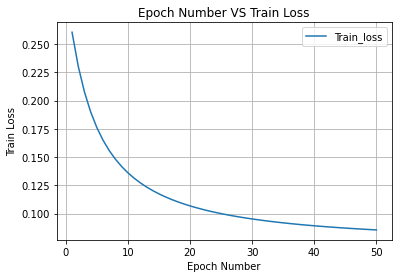

In [47]:
import matplotlib.pyplot as plt
e = [i for i in range(1, 51)]
plt.plot(e,train_loss,label = 'Train_loss') 
plt.legend()
plt.grid()
plt.title('Epoch Number VS Train Loss') 
plt.xlabel('Epoch Number') 
plt.ylabel('Train Loss')
plt.show()

In [50]:
f_test=clf.decision_function(x_test)

In [51]:
prob_list = [] 
for x_q in f_test:
  temp=1/(1+np.exp(-w*x_q-b)) 
  prob_list.append(temp)
prob_list

[0.8899518103197805,
 0.12511692833084803,
 0.04649608899223197,
 0.9103530958600399,
 0.8600762544048548,
 0.7069232427013736,
 0.8644617642453217,
 0.6663083249618144,
 0.0029578003984514225,
 0.03798799330517371,
 0.03987801695206759,
 0.05481218803160806,
 0.019524664286825134,
 0.07751758953999711,
 0.018108992324817472,
 0.752800876512436,
 0.3989686813974159,
 0.40135229807312833,
 0.11076071148991656,
 0.05101044867089022,
 0.03786123580076236,
 0.39555963055430626,
 0.9182141888681041,
 0.015643697500998806,
 0.7523349575381165,
 0.09521675252047121,
 0.9218412227717747,
 0.022868741093174157,
 0.00936171621057745,
 0.049820929494310016,
 0.07293625506189785,
 0.8793026323363301,
 0.04712634284753917,
 0.24612356425938525,
 0.01924802823583422,
 0.055279399613824706,
 0.514341587294535,
 0.2532816610169808,
 0.9535517186567449,
 0.13178597157521457,
 0.10888021012913937,
 0.7992765699934358,
 0.015753829638835867,
 0.9053074666731139,
 0.9109411321157795,
 0.9441996611844822,
